In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
## Data
path_data='/Users/paraskevivourlioti/Documents/NEURALIO/KYKLOS/DATA_KYKLOS/DATA_FOR_TRAINING/SK_agioi10.csv'

In [29]:
df=pd.read_csv(path_data, sep=',')

In [30]:
df

,Date,lon_x,lat_x,Tmax_2T_agioi10,Tmean_2T_agioi10,Tmin_2T_agioi10,GHIagioi10,Yield(Kwh),label
0,2011-01-01,24.9758,35.0753,12.16909,9.320124,6.883661,127,NaN,0
1,2011-01-02,24.9758,35.0753,12.64828,9.924067,7.624811,55,450.950,0
2,2011-01-02,24.9758,35.0753,12.64828,9.924067,7.624811,55,450.950,0
3,2011-01-04,24.9758,35.0753,12.86578,9.468409,7.072290,66,268.050,0
4,2011-01-04,24.9758,35.0753,12.86578,9.468409,7.072290,66,268.050,0
...,...,...,...,...,...,...,...,...,...
1539,2015-12-06,24.9758,35.0753,15.39150,11.159660,7.967950,139,394.881,0
1540,2015-12-06,24.9758,35.0753,15.39150,11.159660,7.967950,139,394.881,0
1541,2015-12-09,24.9758,35.0753,14.95278,12.046410,10.098780,136,479.629,0
1542,2015-12-09,24.9758,35.0753,14.95278,12.046410,10.098780,136,479.629,0


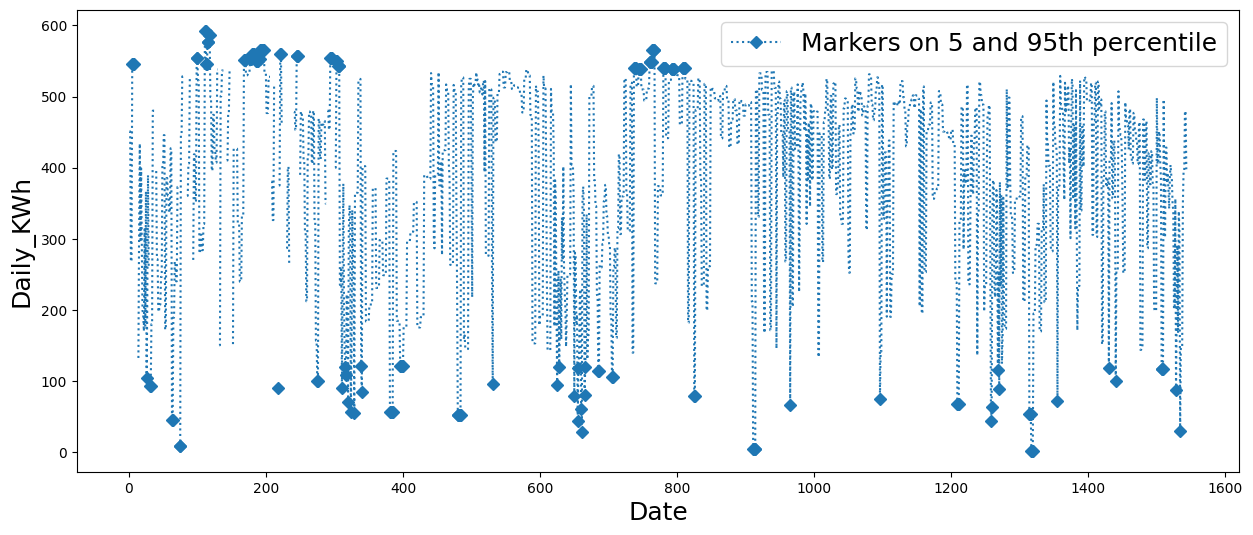

In [31]:
plt.figure(figsize=(15, 6))
#plt.plot(df['Yield(Kwh)'])
label_1=df[df['label']==1]
markers_on=label_1['label']
#print(markers_on.index)
plt.plot(df['Yield(Kwh)'], ':D', markevery=markers_on.index, label='Markers on 5 and 95th percentile')
# Customize the plot, e.g., labels, title, etc.
plt.xlabel("Date", fontsize=18)
plt.ylabel("Daily_KWh", fontsize=18)

#print(label_1)
#print(label_1)
#plt.scatter(label_1['Date'], label_1['Yield(Kwh)'], color='red')
# Display the plot
plt.legend(fontsize=18)
plt.show()


In [32]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

In [33]:
df['Yield(Kwh)'].value_counts(normalize = True)

Yield(Kwh)
184.610    0.003318
424.630    0.003318
384.330    0.003318
55.830     0.003318
384.660    0.003318
             ...   
135.887    0.000664
280.490    0.000664
276.970    0.000664
181.900    0.000664
397.809    0.000664
Name: proportion, Length: 731, dtype: float64

In [34]:
# Train test split
test_size=int(len(df) * 0.2)
train = df.iloc[:-test_size,:].copy()
test = df.iloc[-test_size:,:].copy()
X=df[['Tmean_2T_agioi10', 'GHIagioi10']]
Y=df[['label']]
X_train=train[['Tmean_2T_agioi10', 'GHIagioi10']].copy()
X_test=test[['Tmean_2T_agioi10', 'GHIagioi10']].copy()
#y_train=train[['label']].copy()
#y_test=test[['label']].copy()

y_train=train[['label']].copy()
y_test=test[['label']].copy()

#y_train=train[['Yield(Kwh)']].copy()
#y_test=test[['Yield(Kwh)']].copy()


from sklearn.preprocessing import MinMaxScaler
## Scale all from 0 to 1 
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
 
scaled_y_train = Yscaler.transform(y_train)
scaled_y_test=Yscaler.transform(y_test)
scaled_X_test = Xscaler.transform(X_test)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
#print(f"The training dataset has {sorted(Counter(scaled_y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")
#Counter(scaled_y_train).items()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





The number of records in the training dataset is 1236
The number of records in the test dataset is 308


In [35]:
# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(scaled_X_train)

In [36]:
# Predict the anomalies
prediction = one_class_svm.predict(scaled_X_test)
prediction

# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
scaled_y_test
#prediction
# Check the model performance
print(classification_report(scaled_y_test, prediction))
from sklearn.metrics import precision_score
#print("Precision score: {}".format(precision_score(scaled_y_test,prediction)))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       290
         1.0       0.09      0.06      0.07        18

    accuracy                           0.91       308
   macro avg       0.52      0.51      0.51       308
weighted avg       0.89      0.91      0.90       308



# plot

In [37]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(scaled_X_test)
#Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(scaled_y_test, customized_prediction))

The customized score threshold for 2% of outliers is 8.91
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       290
         1.0       0.14      0.06      0.08        18

    accuracy                           0.93       308
   macro avg       0.54      0.52      0.52       308
weighted avg       0.90      0.93      0.91       308



In [38]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['Tmean_2T_agioi10', 'GHIagioi10'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction

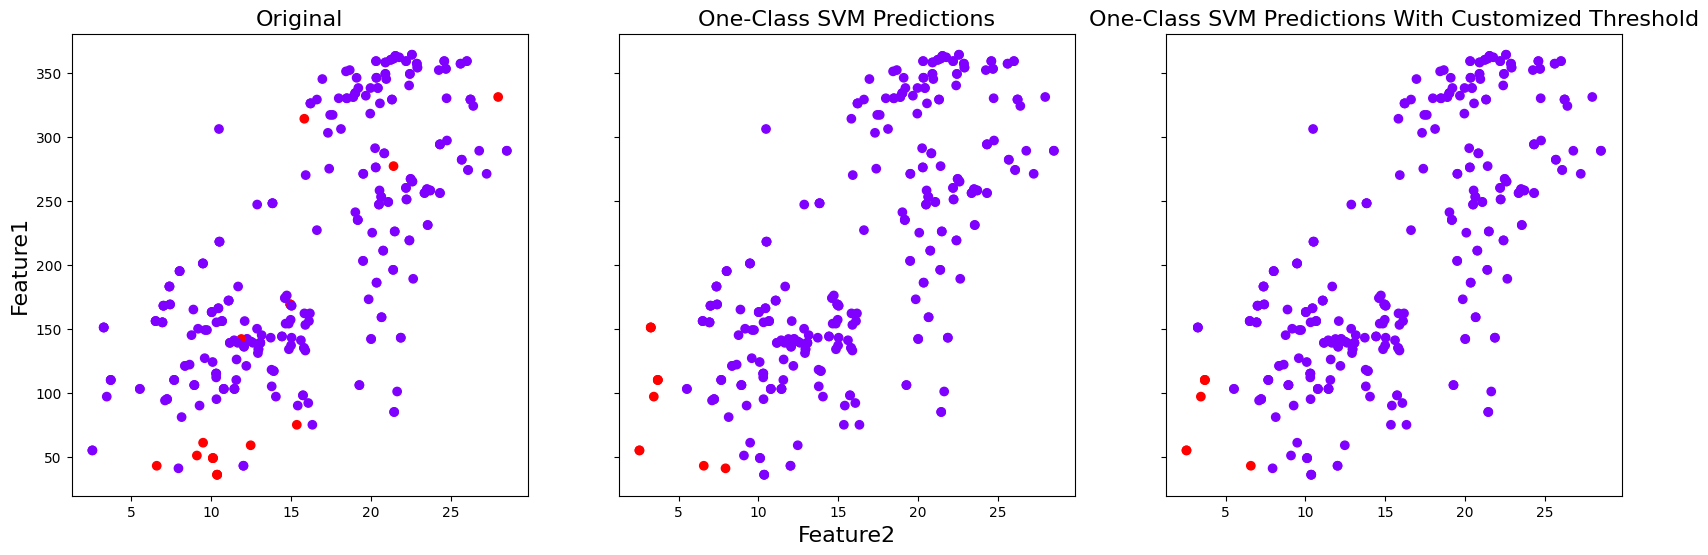

In [43]:
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original', fontsize=16 )
ax0.set_ylabel('Feature1',fontsize=16)
ax0.scatter(df_test['Tmean_2T_agioi10'], df_test['GHIagioi10'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions', fontsize=16)
ax1.set_xlabel('Feature2',fontsize=16)
ax1.scatter(df_test['Tmean_2T_agioi10'], df_test['GHIagioi10'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold', fontsize=16)
ax2.scatter(df_test['Tmean_2T_agioi10'], df_test['GHIagioi10'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')


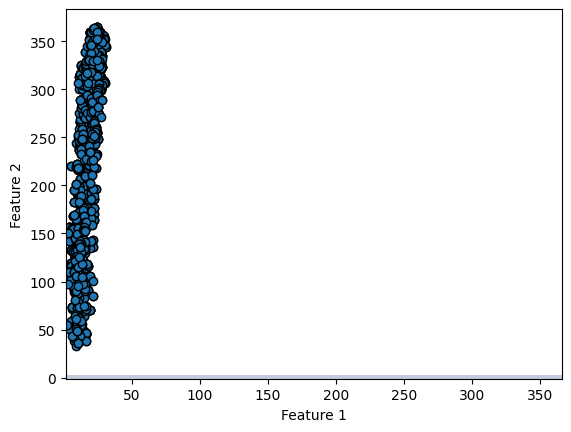

In [318]:
# Create feature plot 
# Create a meshgrid for the feature space
h = 200
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = Y.min() - 1, Y.max() + 1
# x_min=x.min()
# x_max=x.max()
# y_min=y.min()
# y_max=y.max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))

#print(yy)

# Predict the meshgrid using the trained model
Z =  one_class_svm.predict(np.c_[xx.ravel(), yy.ravel()])

# # Plot the learned feature space and decision boundary
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, alpha=0.8,cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X['Tmean_2T_agioi10'], X['GHIagioi10'], edgecolors='k', marker='o')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# #print(Z)
# plt.contourf(xx, yy, Z, alpha=0.5)
# #plt.contourf(xx, yy, Z, alpha=0.8)
# #print(X)
# plt.scatter(X['Tmean_2T_agioi10'], X['GHIagioi10'], c=Y.to_numpy(), edgecolors='k', marker='o')
# #plt.scatter(X['Tmean_2T_agioi10'], X['GHIagioi10'], edgecolors='k', marker='o')
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.title("Learned Feature Space and Decision Boundary")
# plt.show()

# MUC

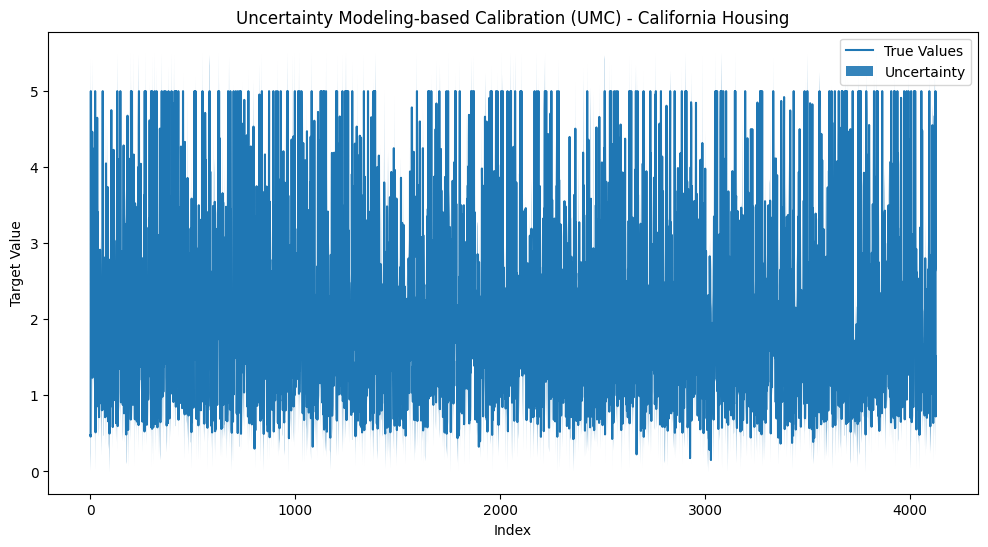

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict the test data
y_pred = rf.predict(X_test)

# Calculate the residuals
residuals = y_test - y_pred

# Model the uncertainty using the standard deviation of the residuals
uncertainty = np.std(residuals)

# Apply UMC by adjusting the predictions based on uncertainty
lower_bound = y_pred - uncertainty
upper_bound = y_pred + uncertainty

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="True Values")
#plt.plot(y_pred, label="Predictions")
plt.fill_between(range(len(y_test)), lower_bound, upper_bound, alpha=0.9, label="Uncertainty")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Target Value")
plt.title("Uncertainty Modeling-based Calibration (UMC) - California Housing")
plt.show()


In [6]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
# Check the target distribution
df['target'].value_counts(normalize = True)

NameError: name 'make_classification' is not defined

In [99]:
X

array([[ 1.23649661,  0.57927154],
       [-0.18872011, -0.02200116],
       [-0.65384426,  0.79430947],
       ...,
       [-0.70049616,  0.30832748],
       [-1.63894133,  0.35149609],
       [-0.43746109,  0.57497027]])

# Example 

In [206]:
# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [216]:
# Create an imbalanced dataset
X, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)
# Convert the data from numpy array to a pandas dataframe
df = pd.DataFrame({'feature1': X[:, 0], 'feature2': X[:, 1], 'target': y})
# Check the target distribution
df['target'].value_counts(normalize = True)
df

,feature1,feature2,target
0,1.236497,0.579272,0
1,-0.188720,-0.022001,0
2,-0.653844,0.794309,0
3,0.005572,0.593370,0
4,0.482573,0.796902,0
...,...,...,...
99995,-1.377568,0.659066,0
99996,-0.252317,0.346224,0
99997,-0.700496,0.308327,0
99998,-1.638941,0.351496,0


In [220]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 80000
The number of records in the test dataset is 20000
The training dataset has 79183 records for the majority class and 817 records for the minority class.


In [218]:
# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [221]:
# Predict the anomalies
prediction = one_class_svm.predict(X_test)
print(X_test,prediction, y_test)
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
#y_test
#prediction
#print(classification_report(y_test, prediction))

[[-0.3876745   0.37414874]
 [-0.61741094  0.37724596]
 [ 0.43176416  0.19134074]
 ...
 [ 1.32002261  0.82395668]
 [-0.06647413  0.75301896]
 [-1.43329582  0.67679353]] [1 1 1 ... 1 1 1] [0 0 0 ... 0 0 0]


In [211]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction))

The customized score threshold for 2% of outliers is 182.62
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19787
           1       0.06      0.10      0.07       213

    accuracy                           0.97     20000
   macro avg       0.52      0.54      0.53     20000
weighted avg       0.98      0.97      0.98     20000



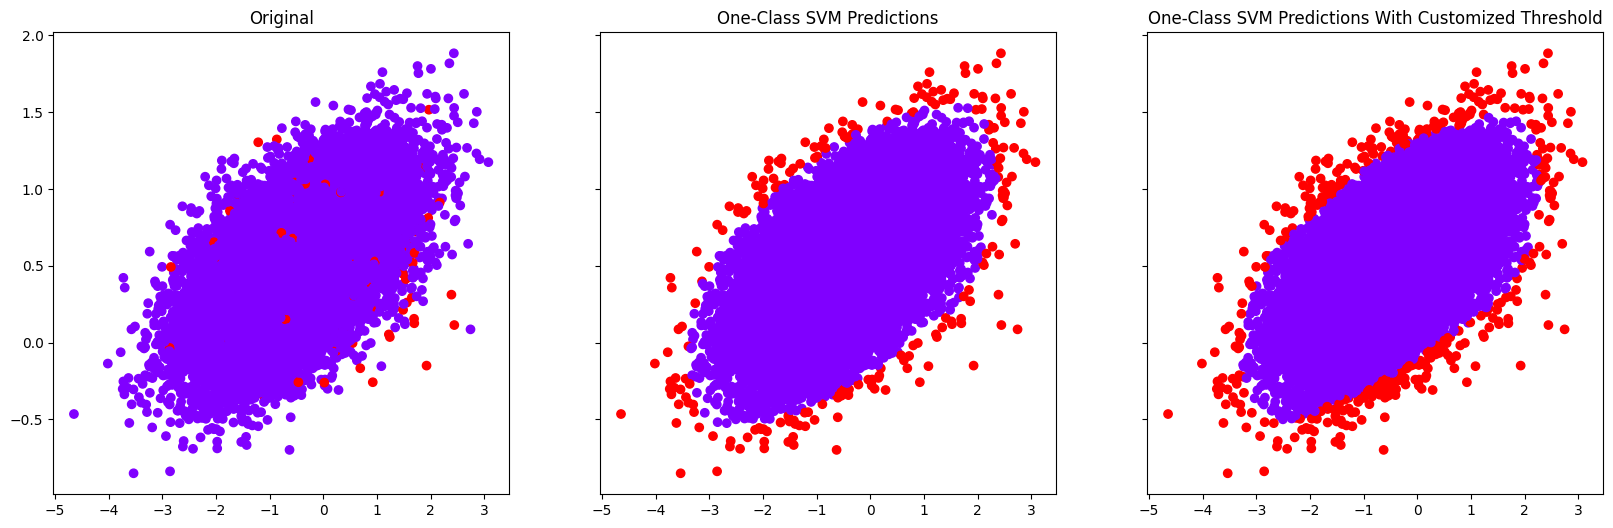

In [212]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

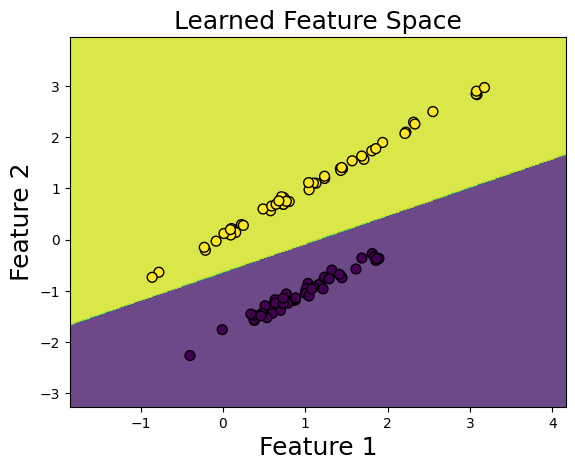

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a synthetic dataset with 2 features
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=42, n_clusters_per_class=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Create a meshgrid for the feature space
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the meshgrid using the trained model
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the learned feature space and decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel("Feature 1", fontsize=18)
plt.ylabel("Feature 2",fontsize=18)
#plt.title("Learned Feature Space and Decision Boundary", fontsize=18)
plt.title("Learned Feature Space", fontsize=18)
plt.show()
